In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train_Data.csv')
print(df.shape)
df.head()

(4999, 9)


,text,author,controversiality,parent_text,parent_score,parent_votes,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,1933,Zhesbe,0,1348


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   text                     4999 non-null   object
 1   author                   4999 non-null   object
 2   controversiality         4999 non-null   int64 
 3   parent_text              4999 non-null   object
 4   parent_score             4999 non-null   int64 
 5   parent_votes             4999 non-null   int64 
 6   parent_author            4999 non-null   object
 7   parent_controversiality  4999 non-null   int64 
 8   Score                    4999 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 351.6+ KB


In [4]:
cols =df.columns.values
cols 

array(['text', 'author', 'controversiality', 'parent_text',
       'parent_score', 'parent_votes', 'parent_author',
       'parent_controversiality', 'Score'], dtype=object)

In [5]:
for col in cols:
    print(col,':',df[col].nunique())

text : 4992
author : 4317
controversiality : 2
parent_text : 4992
parent_score : 1001
parent_votes : 1001
parent_author : 4448
parent_controversiality : 2
Score : 572


In [6]:
# Compare score with votes
df['score vs. votes'] = df['parent_score']==df['parent_votes']
df['score vs. votes'].nunique()

1

In [7]:
# Since they are the same, we can drop one of them
df.drop(['parent_votes', 'score vs. votes'], axis= 1, inplace=True)
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"It's quite unfair to call Hillary Clinton a ""c...",245,Whisper,0,-8
1,DOWNMODDED FOR IRRELEVANCE? ISN'T THAT HOW THI...,['Shadowrose'],0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,"THAT WAS SUPPOSED TO MEAN "" BY A PLACE WHERE P...",['NExusRush'],0,"What the hell does ""because its by a golf cour...",12,mr_jellyneck,0,-7
3,I THOUGHT EVERYONE DID; ITS FUCKING DELICIOUS :\,['R0N_SWANS0N'],0,NICE TRY JENNIFER! I KNOW IT'S YOU AND I KNOW...,117,ometzo,0,67
4,"Great work, Zhesbe! I'd give you a raise but y...",['reddums'],0,"""HEY BOSS COME LOOK AT WHAT I DID!""",1933,Zhesbe,0,1348


In [8]:
# Correlation of numerical features
cor = df.corr()
cor

,controversiality,parent_score,parent_controversiality,Score
controversiality,1.000000,-0.010654,-0.000849,-0.012145
parent_score,-0.010654,1.000000,-0.016473,0.489365
parent_controversiality,-0.000849,-0.016473,1.000000,-0.014935
Score,-0.012145,0.489365,-0.014935,1.000000


<AxesSubplot: >

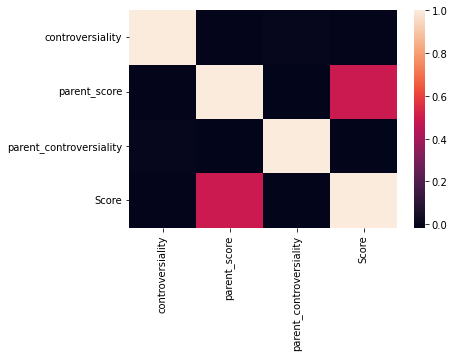

In [9]:
sns.heatmap(df.corr())

In [10]:
# Transfer category values to be lowercased & remove leading and trailing whitespaces
categorical_cols = ['text','author','parent_text','parent_author']
for col in df[categorical_cols]:
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip()
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"it's quite unfair to call hillary clinton a ""c...",245,whisper,0,-8
1,downmodded for irrelevance? isn't that how thi...,['shadowrose'],0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,"that was supposed to mean "" by a place where p...",['nexusrush'],0,"what the hell does ""because its by a golf cour...",12,mr_jellyneck,0,-7
3,i thought everyone did; its fucking delicious :\,['r0n_swans0n'],0,nice try jennifer! i know it's you and i know...,117,ometzo,0,67
4,"great work, zhesbe! i'd give you a raise but y...",['reddums'],0,"""hey boss come look at what i did!""",1933,zhesbe,0,1348


In [11]:
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,['calantus'],0,"it's quite unfair to call hillary clinton a ""c...",245,whisper,0,-8
1,downmodded for irrelevance? isn't that how thi...,['shadowrose'],0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,"that was supposed to mean "" by a place where p...",['nexusrush'],0,"what the hell does ""because its by a golf cour...",12,mr_jellyneck,0,-7
3,i thought everyone did; its fucking delicious :\,['r0n_swans0n'],0,nice try jennifer! i know it's you and i know...,117,ometzo,0,67
4,"great work, zhesbe! i'd give you a raise but y...",['reddums'],0,"""hey boss come look at what i did!""",1933,zhesbe,0,1348


In [12]:
#Remove punctuation marks
import string

for col in df[categorical_cols]:
    df[col] = df[col].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,i must be retarded i thought it meant con lawl...,calantus,0,its quite unfair to call hillary clinton a cun...,245,whisper,0,-8
1,downmodded for irrelevance isnt that how this ...,shadowrose,0,upmodded for awesome kindness,32,b3mus3d,0,-16
2,that was supposed to mean by a place where pe...,nexusrush,0,what the hell does because its by a golf cours...,12,mrjellyneck,0,-7
3,i thought everyone did its fucking delicious,r0nswans0n,0,nice try jennifer i know its you and i know y...,117,ometzo,0,67
4,great work zhesbe id give you a raise but you ...,reddums,0,hey boss come look at what i did,1933,zhesbe,0,1348


In [13]:
text_tokens=df['text'].values
parent_text_tokens=df['parent_text'].values

In [14]:
text_tokens[:2]

array(['i must be retarded i thought it meant con lawl oh well both work',
       'downmodded for irrelevance isnt that how this works'],
      dtype=object)

In [15]:
import re
# \w={a-zA-Z0-9_}
# \W=other than \w
text_tokens_re=[re.sub('\W',' ',m) for m in text_tokens]
print(text_tokens_re[:3])
parent_text_tokens_re=[re.sub('\W',' ',m) for m in parent_text_tokens]
print(parent_text_tokens_re[:3])

['i must be retarded i thought it meant con lawl oh well both work', 'downmodded for irrelevance isnt that how this works', 'that was supposed to mean  by a place where people will be undoubtedly and should the snake have burrowed in the course grounds they would have for sure killed it   dont make a raceclass discussion out of something that isnt']
['its quite unfair to call hillary clinton a cunt  she lacks the depth and the warmth', 'upmodded for awesome kindness', 'what the hell does because its by a golf course have to do with anything did you think a bunch of rich white men golfclapped at the euthanizing of a monsterous snake']


In [16]:
# removing multiple white spaces to single space
text_tokens_re=[re.sub('\s+',' ',m).strip() for m in text_tokens_re]
print(text_tokens_re[:3])
# removing multiple white spaces to single space
parent_text_tokens_re=[re.sub('\s+',' ',m).strip() for m in parent_text_tokens_re]
print(parent_text_tokens_re[:3])

['i must be retarded i thought it meant con lawl oh well both work', 'downmodded for irrelevance isnt that how this works', 'that was supposed to mean by a place where people will be undoubtedly and should the snake have burrowed in the course grounds they would have for sure killed it dont make a raceclass discussion out of something that isnt']
['its quite unfair to call hillary clinton a cunt she lacks the depth and the warmth', 'upmodded for awesome kindness', 'what the hell does because its by a golf course have to do with anything did you think a bunch of rich white men golfclapped at the euthanizing of a monsterous snake']


In [17]:
# 1 using nltk stop word packkages

from nltk.corpus import stopwords
sw=stopwords.words('english')
# sw

In [18]:
text_tokens_without_sw=[]
for msg in text_tokens_re:
    msg_cleaned=[]
    for m in msg.split():
        if m not in sw:
            msg_cleaned.append(m)
    text_tokens_without_sw.append(' '.join(msg_cleaned))

In [19]:
text_tokens_without_sw[:2]

['must retarded thought meant con lawl oh well work',
 'downmodded irrelevance isnt works']

In [20]:
parent_text_tokens_without_sw=[]
for msg in parent_text_tokens_re:
    msg_cleaned=[]
    for m in msg.split():
        if m not in sw:
            msg_cleaned.append(m)
    parent_text_tokens_without_sw.append(' '.join(msg_cleaned))

In [21]:
parent_text_tokens_without_sw[:2]

['quite unfair call hillary clinton cunt lacks depth warmth',
 'upmodded awesome kindness']

In [22]:
# removing digits
text_tokens_without_sw_digits=[re.sub('\d+','',m) for m in text_tokens_without_sw]
print(text_tokens_without_sw_digits[:4])
# removing digits
parent_text_tokens_without_sw_digits=[re.sub('\d+','',m) for m in parent_text_tokens_without_sw]
parent_text_tokens_without_sw_digits[:4]

['must retarded thought meant con lawl oh well work', 'downmodded irrelevance isnt works', 'supposed mean place people undoubtedly snake burrowed course grounds would sure killed dont make raceclass discussion something isnt', 'thought everyone fucking delicious']


['quite unfair call hillary clinton cunt lacks depth warmth',
 'upmodded awesome kindness',
 'hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake',
 'nice try jennifer know know like baba ganoush']

In [23]:
# removing single or double charecter words
text_tokens_without_sw=[re.sub('\s\w{1,2}\s','',m) for m in text_tokens_without_sw]
print(text_tokens_without_sw[:4])
# removing single or double charecter words
parent_text_tokens_without_sw=[re.sub('\s\w{1,2}\s','',m) for m in parent_text_tokens_without_sw]
parent_text_tokens_without_sw[:4]

['must retarded thought meant con lawlwell work', 'downmodded irrelevance isnt works', 'supposed mean place people undoubtedly snake burrowed course grounds would sure killed dont make raceclass discussion something isnt', 'thought everyone fucking delicious']


['quite unfair call hillary clinton cunt lacks depth warmth',
 'upmodded awesome kindness',
 'hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake',
 'nice try jennifer know know like baba ganoush']

In [24]:
# # removing single or double charecter words at starting 
text_tokens_without_sw=[re.sub('\s\w{1,2}\s','',m) for m in text_tokens_without_sw]
print(text_tokens_without_sw[:4])
# # removing single or double charecter words at starting 
parent_text_tokens_without_sw=[re.sub('\s\w{1,2}\s','',m) for m in parent_text_tokens_without_sw]
parent_text_tokens_without_sw[:4]

['must retarded thought meant con lawlwell work', 'downmodded irrelevance isnt works', 'supposed mean place people undoubtedly snake burrowed course grounds would sure killed dont make raceclass discussion something isnt', 'thought everyone fucking delicious']


['quite unfair call hillary clinton cunt lacks depth warmth',
 'upmodded awesome kindness',
 'hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake',
 'nice try jennifer know know like baba ganoush']

In [25]:
# # removing single or double charecter words at starting 
text_tokens_without_sw=[re.sub('\s\w{1,2}$','',m) for m in text_tokens_without_sw]
print(text_tokens_without_sw[:4])
# # removing single or double charecter words at starting 
parent_text_tokens_without_sw=[re.sub('\s\w{1,2}$','',m) for m in parent_text_tokens_without_sw]
parent_text_tokens_without_sw[:4]

['must retarded thought meant con lawlwell work', 'downmodded irrelevance isnt works', 'supposed mean place people undoubtedly snake burrowed course grounds would sure killed dont make raceclass discussion something isnt', 'thought everyone fucking delicious']


['quite unfair call hillary clinton cunt lacks depth warmth',
 'upmodded awesome kindness',
 'hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake',
 'nice try jennifer know know like baba ganoush']

In [26]:
# removing multiple white spaces to single space
text_tokens_without_sw=[re.sub('\s+',' ',m) for m in text_tokens_without_sw]
print(text_tokens_without_sw[:4])
# removing multiple white spaces to single space
# # removing single or double charecter words at starting 
parent_text_tokens_without_sw=[re.sub('\s+',' ',m) for m in parent_text_tokens_without_sw]
parent_text_tokens_without_sw[:4]

['must retarded thought meant con lawlwell work', 'downmodded irrelevance isnt works', 'supposed mean place people undoubtedly snake burrowed course grounds would sure killed dont make raceclass discussion something isnt', 'thought everyone fucking delicious']


['quite unfair call hillary clinton cunt lacks depth warmth',
 'upmodded awesome kindness',
 'hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake',
 'nice try jennifer know know like baba ganoush']

In [27]:
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [28]:
ps=PorterStemmer()
lm=WordNetLemmatizer()

In [29]:
text_tokens_stem=[]
text_tokens_lem=[]
for msg in text_tokens_without_sw:
    msg_stem=[]
    msg_lem=[]
    for m in word_tokenize(msg):
        msg_stem.append(ps.stem(m))
        msg_lem.append(lm.lemmatize(m))
    text_tokens_stem.append(' '.join(msg_stem))
    text_tokens_lem.append(' '.join(msg_lem))

In [30]:
for m1,m2,m3 in zip(text_tokens_without_sw[:4],text_tokens_stem[:4],text_tokens_lem[:4]):
    print(m1)
    print(m2)
    print(m3)
    print("##################################")

must retarded thought meant con lawlwell work
must retard thought meant con lawlwel work
must retarded thought meant con lawlwell work
##################################
downmodded irrelevance isnt works
downmod irrelev isnt work
downmodded irrelevance isnt work
##################################
supposed mean place people undoubtedly snake burrowed course grounds would sure killed dont make raceclass discussion something isnt
suppos mean place peopl undoubtedli snake burrow cours ground would sure kill dont make raceclass discuss someth isnt
supposed mean place people undoubtedly snake burrowed course ground would sure killed dont make raceclass discussion something isnt
##################################
thought everyone fucking delicious
thought everyon fuck delici
thought everyone fucking delicious
##################################


In [31]:
parent_text_tokens_stem=[]
parent_text_tokens_lem=[]
for msg in parent_text_tokens_without_sw:
    msg_stem=[]
    msg_lem=[]
    for m in word_tokenize(msg):
        msg_stem.append(ps.stem(m))
        msg_lem.append(lm.lemmatize(m))
    parent_text_tokens_stem.append(' '.join(msg_stem))
    parent_text_tokens_lem.append(' '.join(msg_lem))

In [32]:
for m1,m2,m3 in zip(parent_text_tokens_without_sw[:4],parent_text_tokens_stem[:4],parent_text_tokens_lem[:4]):
    print(m1)
    print(m2)
    print(m3)
    print("##################################")

quite unfair call hillary clinton cunt lacks depth warmth
quit unfair call hillari clinton cunt lack depth warmth
quite unfair call hillary clinton cunt lack depth warmth
##################################
upmodded awesome kindness
upmod awesom kind
upmodded awesome kindness
##################################
hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake
hell golf cours anyth think bunch rich white men golfclap euthan monster snake
hell golf course anything think bunch rich white men golfclapped euthanizing monsterous snake
##################################
nice try jennifer know know like baba ganoush
nice tri jennif know know like baba ganoush
nice try jennifer know know like baba ganoush
##################################


In [36]:
df['text']= text_tokens_lem
df['parent_text']=parent_text_tokens_lem

In [37]:
df.head()

,text,author,controversiality,parent_text,parent_score,parent_author,parent_controversiality,Score
0,must retarded thought meant con lawlwell work,calantus,0,quite unfair call hillary clinton cunt lack de...,245,whisper,0,-8
1,downmodded irrelevance isnt work,shadowrose,0,upmodded awesome kindness,32,b3mus3d,0,-16
2,supposed mean place people undoubtedly snake b...,nexusrush,0,hell golf course anything think bunch rich whi...,12,mrjellyneck,0,-7
3,thought everyone fucking delicious,r0nswans0n,0,nice try jennifer know know like baba ganoush,117,ometzo,0,67
4,great work zhesbegive raise seem handled,reddums,0,hey bos come look,1933,zhesbe,0,1348


In [38]:
# Vectorize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [39]:
c_vect = CountVectorizer()
text = c_vect.fit_transform(df['text']).toarray()
text = pd.DataFrame(text, columns=c_vect.get_feature_names())


C:\Users\vip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
text.shape

(4999, 15187)

In [41]:
tfidf_vect = TfidfVectorizer(max_features=50,min_df=1,max_df=0.7)
text_tf_idf = tfidf_vect.fit_transform(df['text']).toarray()
text_tf_idf = pd.DataFrame(text_tf_idf, columns=tfidf_vect.get_feature_names())

text_tf_idf.shape

C:\Users\vip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(4999, 50)

In [42]:
text_tf_idf.head()

,actually,also,better,cant,could,didnt,doesnt,dont,even,first,...,thing,think,time,want,way,well,work,would,year,youre
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348246,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.377154,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0


In [43]:
Col1=text_tf_idf.columns
Col1

Index(['actually', 'also', 'better', 'cant', 'could', 'didnt', 'doesnt',
       'dont', 'even', 'first', 'fuck', 'fucking', 'game', 'get', 'going',
       'good', 'got', 'guy', 'know', 'like', 'look', 'make', 'man', 'mean',
       'much', 'need', 'never', 'one', 'people', 'point', 'really', 'right',
       'say', 'see', 'shit', 'someone', 'something', 'still', 'take', 'thats',
       'thing', 'think', 'time', 'want', 'way', 'well', 'work', 'would',
       'year', 'youre'],
      dtype='object')

In [44]:
num_cols = df[['controversiality', 'parent_score', 'parent_controversiality']]
print(num_cols.shape)
num_cols.head()

(4999, 3)


,controversiality,parent_score,parent_controversiality
0,0,245,0
1,0,32,0
2,0,12,0
3,0,117,0
4,0,1933,0


In [45]:
Col2=num_cols.columns
Col2

Index(['controversiality', 'parent_score', 'parent_controversiality'], dtype='object')

In [46]:
x = np.hstack((text_tf_idf, num_cols))

In [47]:
col=np.hstack((Col1,Col2))
col

array(['actually', 'also', 'better', 'cant', 'could', 'didnt', 'doesnt',
       'dont', 'even', 'first', 'fuck', 'fucking', 'game', 'get', 'going',
       'good', 'got', 'guy', 'know', 'like', 'look', 'make', 'man',
       'mean', 'much', 'need', 'never', 'one', 'people', 'point',
       'really', 'right', 'say', 'see', 'shit', 'someone', 'something',
       'still', 'take', 'thats', 'thing', 'think', 'time', 'want', 'way',
       'well', 'work', 'would', 'year', 'youre', 'controversiality',
       'parent_score', 'parent_controversiality'], dtype=object)

In [48]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,245.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,32.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348246,0.0,0.0,...,0.0,0.0,0.0,0.0,0.377154,0.0,0.0,0.0,12.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,117.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1933.0,0.0


In [49]:
x.columns=col

In [50]:
x.head()

,actually,also,better,cant,could,didnt,doesnt,dont,even,first,...,want,way,well,work,would,year,youre,controversiality,parent_score,parent_controversiality
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,245.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,32.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.348246,0.0,0.0,...,0.0,0.0,0.0,0.0,0.377154,0.0,0.0,0.0,12.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,117.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,1933.0,0.0


In [51]:
x.shape

(4999, 53)

In [52]:

y = df['Score']
y.shape

(4999,)

In [53]:
from sklearn.model_selection import train_test_split

# split the data
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.20, random_state = 42)

In [54]:
# Linear regressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [55]:
lr.fit(x_train.values, y_train.values)

LinearRegression()

In [56]:
pred_y = lr.predict(x_val.values)
from sklearn.metrics import r2_score

In [57]:
r2_score(y_val,pred_y)

0.3172530087468962

In [58]:
from sklearn.metrics import mean_squared_error

In [59]:
print(np.sqrt(mean_squared_error(y_val,pred_y))/len(y_val))

0.14749252357745282


In [60]:
# XGB regressor
from xgboost import XGBRegressor

xgbReg = XGBRegressor(verbosity=0)
xgbReg.fit(x_train, y_train)

pred_y1 = xgbReg.predict(x_val)

In [61]:
r2_score(y_val,pred_y1)


0.15415762488123141

In [62]:
print(np.sqrt(mean_squared_error(y_val,pred_y1))/len(y_val))

0.16416660927103946


In [63]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Hyperparameter for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 100)}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x_train, y_train)
knn_cv.best_params_

{'n_neighbors': 50}

In [64]:
knn = KNeighborsRegressor(n_neighbors = 97)
knn.fit(x_train, y_train)

pred_y2 = knn.predict(x_val)


In [65]:
r2_score(y_val,pred_y2)

0.3833601057099788

In [66]:
print(np.sqrt(mean_squared_error(y_val,pred_y2))/len(y_val))

0.1401702726784711


In [67]:
import pickle
filename="finalized_model1.pkl"
pickle.dump(lr,open(filename,'wb'))

In [68]:
# pickling 
filename="finalized_model2.pkl"
pickle.dump(xgbReg,open(filename,'wb'))

In [69]:
# pickling
filename="finalized_model3.pkl"
pickle.dump(knn,open(filename,'wb'))